# Metodo local

In [8]:
import pandas as pd ## Pandas: https://pandas.pydata.org/docs/
import matplotlib.pyplot as plt

from google.colab import files
#uploaded = files.upload() # para cargar archivos desde la pc a colab
import io


In [23]:
df2 = pd.read_csv("/content/dnrpa-robos-recuperos-autos-202201.csv",sep=",") # subir el archivo desde la pc
df2.head(3)

dict

# Metodo drive

In [2]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# cd permite movernos entre las carpetas, cambiar segun su google drive
%cd '/content/gdrive/MyDrive/CODERHOUSE PROFE/Data Science || curso/Data Science_ Machine Learning/Clase 2 - Data Acquisition'
df2 = pd.read_csv('dnrpa-robos-recuperos-autos-202201.csv',sep=",")
df2.head(3)

/content/gdrive/MyDrive/CODERHOUSE PROFE/Data Science || curso/Data Science_ Machine Learning/Clase 2 - Data Acquisition


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994.0,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000.0,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994.0,NaN,FUR.VIDRIADO C/ASIEN,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,2,NaN


In [4]:
df2.shape
print('El df tiene {} instancias y {} features'.format(df2.shape[0],df2.shape[1]))

El df tiene 2676 instancias y 25 features


In [5]:
df2.dtypes

tramite_tipo                       object
tramite_fecha                      object
fecha_inscripcion_inicial          object
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
automotor_origen                   object
automotor_anio_modelo             float64
automotor_tipo_codigo              object
automotor_tipo_descripcion         object
automotor_marca_codigo             object
automotor_marca_descripcion        object
automotor_modelo_codigo            object
automotor_modelo_descripcion       object
automotor_uso_codigo                int64
automotor_uso_descripcion          object
titular_tipo_persona               object
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_genero                     object
titular_anio_nacimiento             int64
titular_pais_nacimiento            object
titular_porcentaje_titularidad      int64
titular_domicilio_provincia_id    

In [6]:
df2.describe()

,registro_seccional_codigo,automotor_anio_modelo,automotor_uso_codigo,titular_anio_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id
count,2676.000000,2671.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,3519.189462,2006.236615,1.011958,1978.030643,97.482063,13.668161
std,5187.429542,39.245632,0.180981,14.265932,11.078111,20.038928
min,1001.000000,20.000000,1.000000,1909.000000,1.000000,2.000000
25%,1161.000000,2000.000000,1.000000,1969.000000,100.000000,6.000000
50%,1249.000000,2008.000000,1.000000,1979.000000,100.000000,6.000000
75%,2071.000000,2013.000000,1.000000,1989.000000,100.000000,6.000000
max,24007.000000,2021.000000,9.000000,2020.000000,100.000000,94.000000


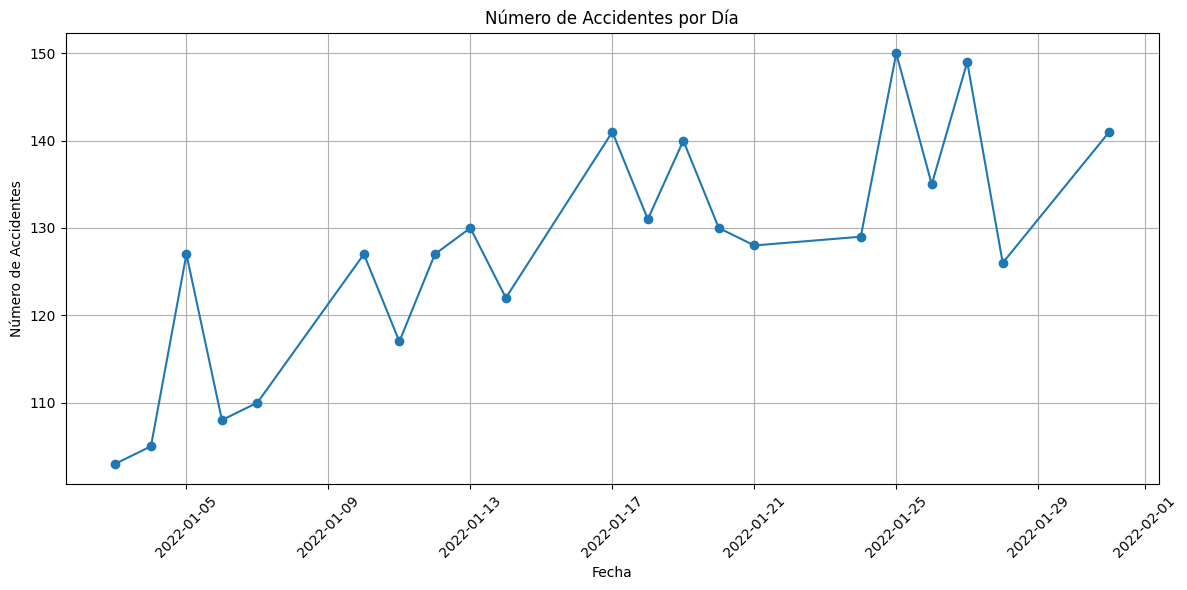

In [9]:
# Convertir la columna 'tramite_fecha' a formato datetime
df2['tramite_fecha'] = pd.to_datetime(df2['tramite_fecha'])

# Agrupar por fecha (día) y contar la cantidad de accidentes por día
daily_accidents = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()

# Convertir el índice a datetime para facilitar el plot
daily_accidents.index = daily_accidents.index.to_timestamp()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Número de Accidentes por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Marca mas robada

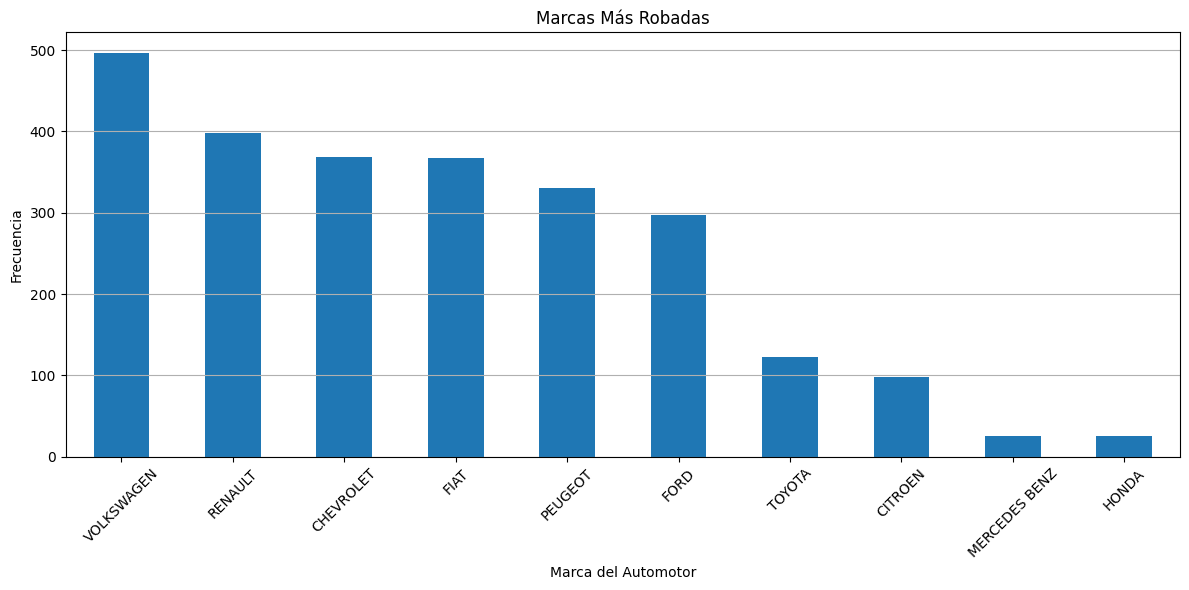

In [10]:
# Contar la frecuencia de cada marca de automotor
marca_counts = df2['automotor_marca_descripcion'].value_counts()[:10]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
marca_counts.plot(kind='bar')

# Personalizar el gráfico
plt.title('Marcas Más Robadas')
plt.xlabel('Marca del Automotor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y')  # Añadir una cuadrícula horizontal para facilitar la lectura

# Mostrar el gráfico
plt.tight_layout()
plt.show()

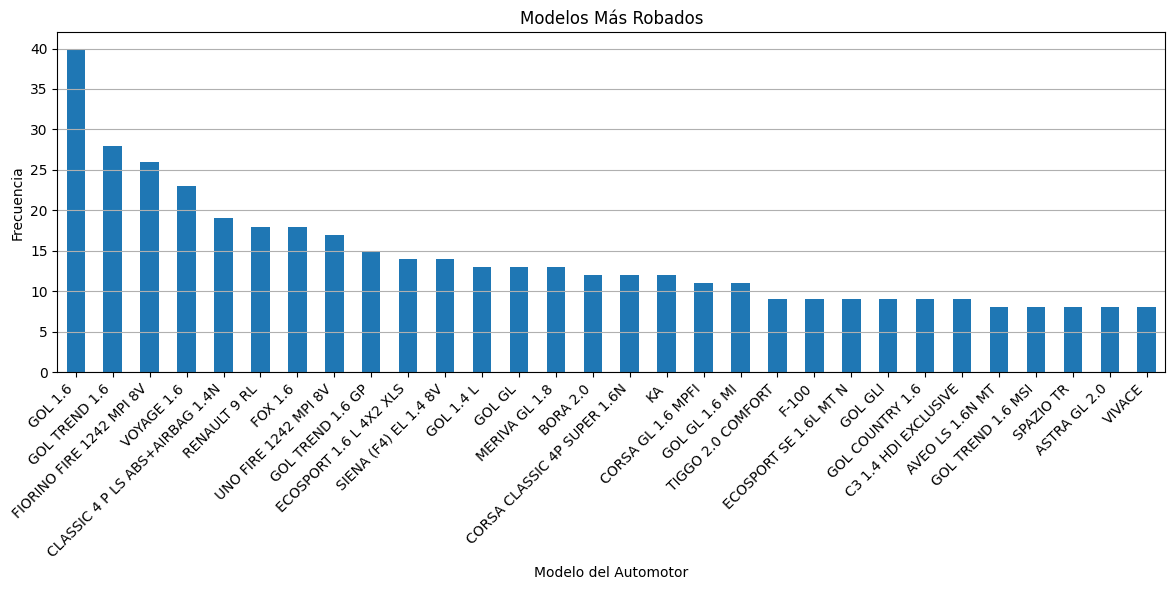

In [11]:
# Obtener los 50 modelos de automotor más robados
top_50_modelos = df2['automotor_modelo_descripcion'].value_counts().iloc[0:30]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
top_50_modelos.plot(kind='bar')

# Personalizar el gráfico
plt.title('Modelos Más Robados')
plt.xlabel('Modelo del Automotor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x y alinearlas a la derecha
plt.grid(axis='y')  # Añadir una cuadrícula horizontal para facilitar la lectura

# Mostrar el gráfico
plt.tight_layout()
plt.show()

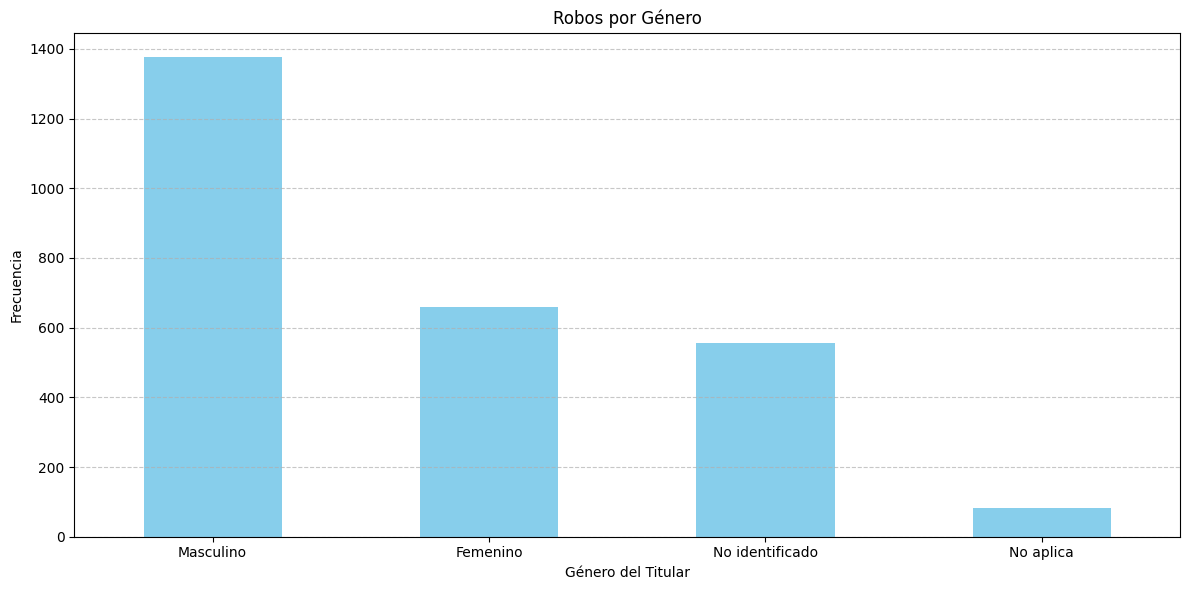

In [12]:
# Contar la frecuencia de cada género
genero_counts = df2['titular_genero'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
genero_counts.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Robos por Género')
plt.xlabel('Género del Titular')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que estén en posición horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal con estilo y transparencia

# Mostrar el gráfico
plt.tight_layout()
plt.show()

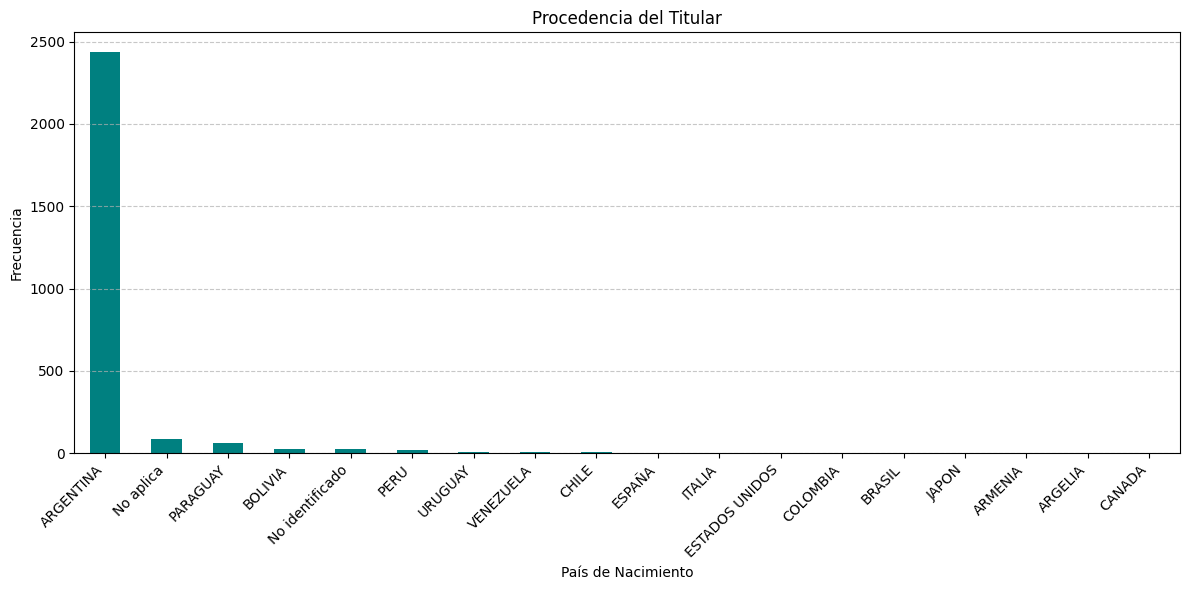

In [13]:
# Contar la frecuencia de cada país de nacimiento
pais_counts = df2['titular_pais_nacimiento'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
pais_counts.plot(kind='bar', color='teal')

# Personalizar el gráfico
plt.title('Procedencia del Titular')
plt.xlabel('País de Nacimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal con estilo y transparencia

# Mostrar el gráfico
plt.tight_layout()
plt.show()

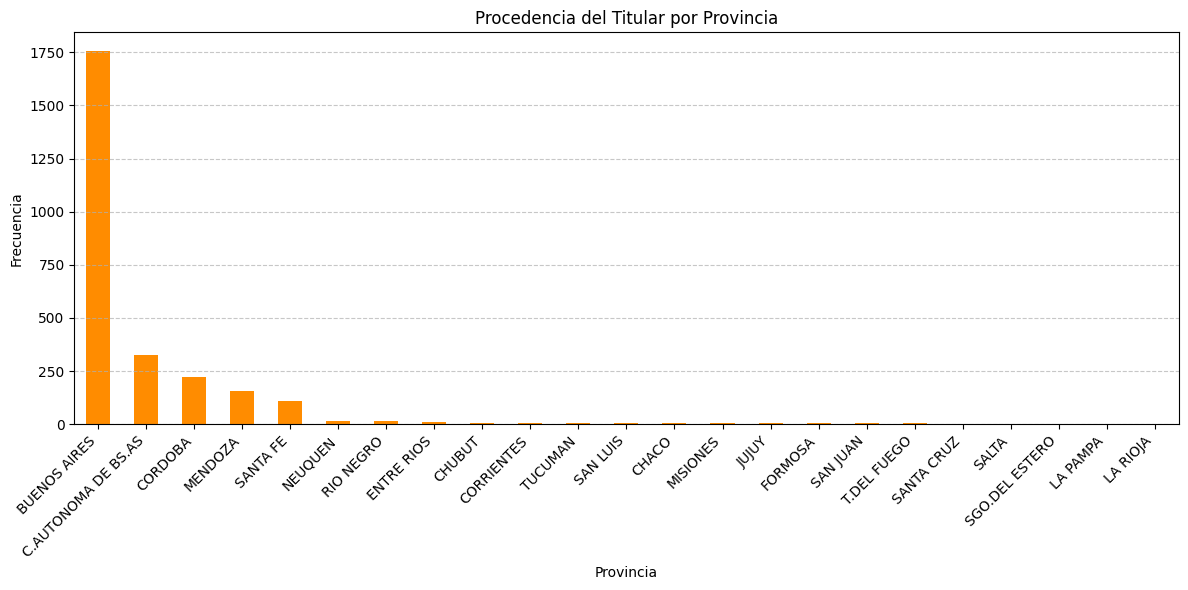

In [14]:
# Contar la frecuencia de cada provincia
provincia_counts = df2['titular_domicilio_provincia'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
provincia_counts.plot(kind='bar', color='darkorange')

# Personalizar el gráfico
plt.title('Procedencia del Titular por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal con estilo y transparencia

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## SQL

In [19]:
import sqlite3 as sql

conn= sql.connect('/content/nba_salary.sqlite') # recordar subirla desde su pc o google drive
conn

In [20]:
# Visualizar las tablas
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor. fetchall())

[('NBA_season1718_salary',), ('Seasons_Stats',)]


In [21]:
df_salary = pd.read_sql_query("SELECT * from NBA_season1718_salary", conn)
df_salary.head()

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


In [22]:
df_stats = pd.read_sql_query("SELECT * from Seasons_Stats", conn)
df_stats.head()

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# JSON

In [23]:
# De una URL
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head(10)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [26]:
# Miremos este caso especial
df = pd.read_json('/content/nested_json.json')# recordar subirlo desde la pc o drive
df # tenemos un JSON nested

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [27]:
import json
# Normalizar los datos
with open('/content/nested_json.json','r') as f:
    data = json.loads(f.read())# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['students'])
df_nested_list

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [28]:
# Combinando
df_nested_list = pd.json_normalize(
    data,
    record_path =['students'],
    meta=['school_name', 'class']
)
df_nested_list

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


# APIs

# yfinance --> Yahoo Finance


In [29]:
!pip install yfinance

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt

In [31]:
pfe = yf.Ticker('PFE')
pfe.info

{'address1': '66 Hudson Boulevard East',
 'city': 'New York',
 'state': 'NY',
 'zip': '10001-2192',
 'country': 'United States',
 'phone': '212 733 2323',
 'website': 'https://www.pfizer.com',
 'industry': 'Drug Manufacturers - General',
 'industryKey': 'drug-manufacturers-general',
 'industryDisp': 'Drug Manufacturers - General',
 'sector': 'Healthcare',
 'sectorKey': 'healthcare',
 'sectorDisp': 'Healthcare',
 'longBusinessSummary': "Pfizer Inc. discovers, develops, manufactures, markets, distributes, and sells biopharmaceutical products in the United States, Europe, and internationally. The company offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic, migraine, and women's health under the Eliquis, Nurtec ODT/Vydura, Zavzpret, and the Premarin family brands; infectious diseases with unmet medical needs under the Prevnar family, Abrysvo, Nimenrix, FSME/IMMUN-TicoVac, and Trumenba brands; and COVID-19 prevention and treatment, and potential fu

In [32]:
# Scar los dividendos
pfe.actions

,Dividends,Stock Splits
Date,,
1972-08-29 00:00:00-04:00,0.003163,0.0
1972-11-28 00:00:00-05:00,0.004151,0.0
1973-02-28 00:00:00-05:00,0.003163,0.0
1973-05-30 00:00:00-04:00,0.003163,0.0
1973-08-28 00:00:00-04:00,0.003163,0.0
...,...,...
2023-05-11 00:00:00-04:00,0.410000,0.0
2023-07-27 00:00:00-04:00,0.410000,0.0
2023-11-09 00:00:00-05:00,0.410000,0.0


In [33]:
# period: Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Tambien se puede colocar start, end
hist = pfe.history(period="6mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-19 00:00:00-05:00,27.204189,27.543875,27.107134,27.446823,35313100,0.00,0.0
2024-01-22 00:00:00-05:00,27.485641,27.776803,27.107131,27.475935,41663900,0.00,0.0
2024-01-23 00:00:00-05:00,27.602109,27.805921,27.320652,27.592403,33466700,0.00,0.0
2024-01-24 00:00:00-05:00,27.699162,27.932091,27.495348,27.495348,42720700,0.00,0.0
2024-01-25 00:00:00-05:00,27.406684,27.505199,27.042182,27.061884,47605500,0.42,0.0
...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,28.900000,29.139999,28.790001,28.920000,28384300,0.00,0.0
2024-07-15 00:00:00-04:00,29.030001,29.270000,28.830000,29.100000,30534400,0.00,0.0
2024-07-16 00:00:00-04:00,29.200001,29.559999,29.120001,29.500000,26912100,0.00,0.0


# Lectura en serie de datos

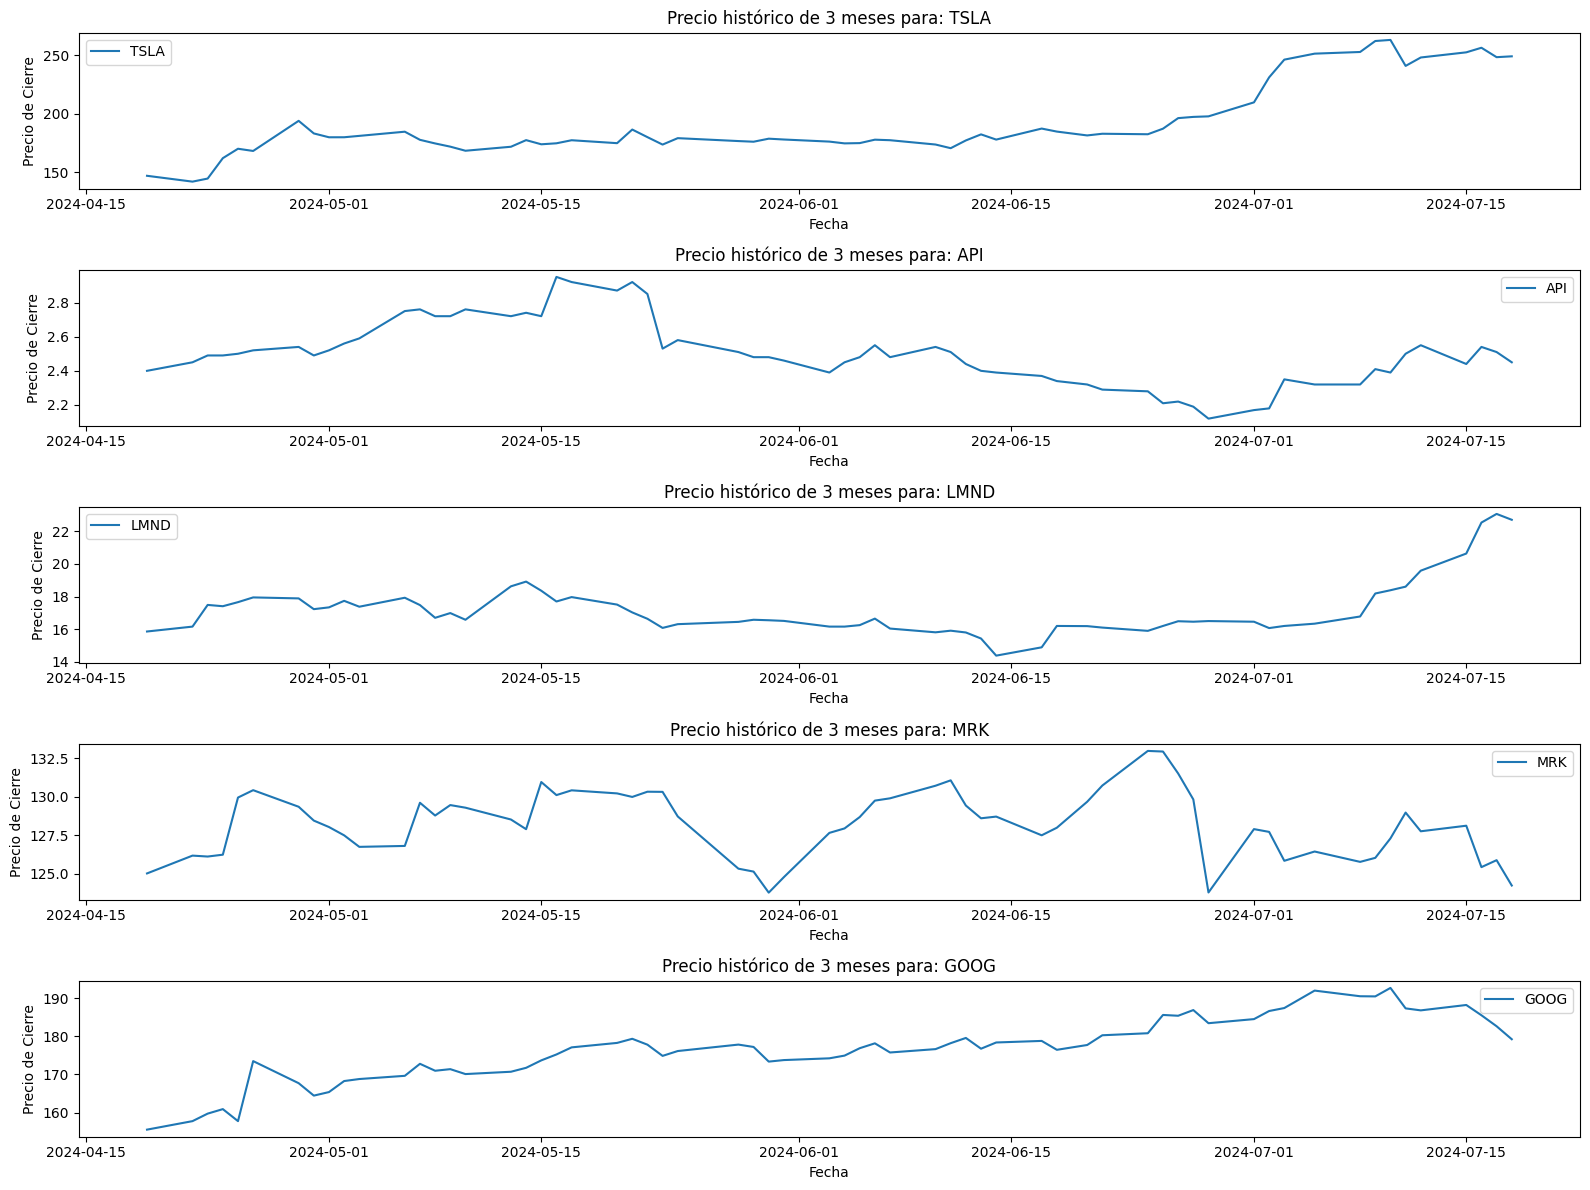

In [34]:
tickers = ['TSLA', 'API', 'LMND', 'MRK', 'GOOG']
plt.figure(figsize=(16, 12))  # Ajustar el tamaño de la figura para mejor visualización

for i, ticker in enumerate(tickers):
    current_ticker = yf.Ticker(ticker)
    data = current_ticker.history(period='3mo')['Close']
    plt.subplot(len(tickers), 1, i + 1)
    plt.plot(data, label=ticker)
    plt.title(f'Precio histórico de 3 meses para: {ticker}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend()

plt.tight_layout()
plt.show()

In [35]:
# Informacion del primero
ticker = tickers[0]
yf_info = yf.Ticker(ticker).info
print(ticker)

TSLA


In [36]:
# Creciemito de 52 semanas
yf_info['52WeekChange']

-0.05477369

NVS - 52WeekChange: 0.06344521, ProfitMargins: 0.31938
JNJ - 52WeekChange: -0.070079565, ProfitMargins: 0.44923002
ABBV - 52WeekChange: 0.23264647, ProfitMargins: 0.11016
AMGN - 52WeekChange: 0.43922305, ProfitMargins: 0.12742


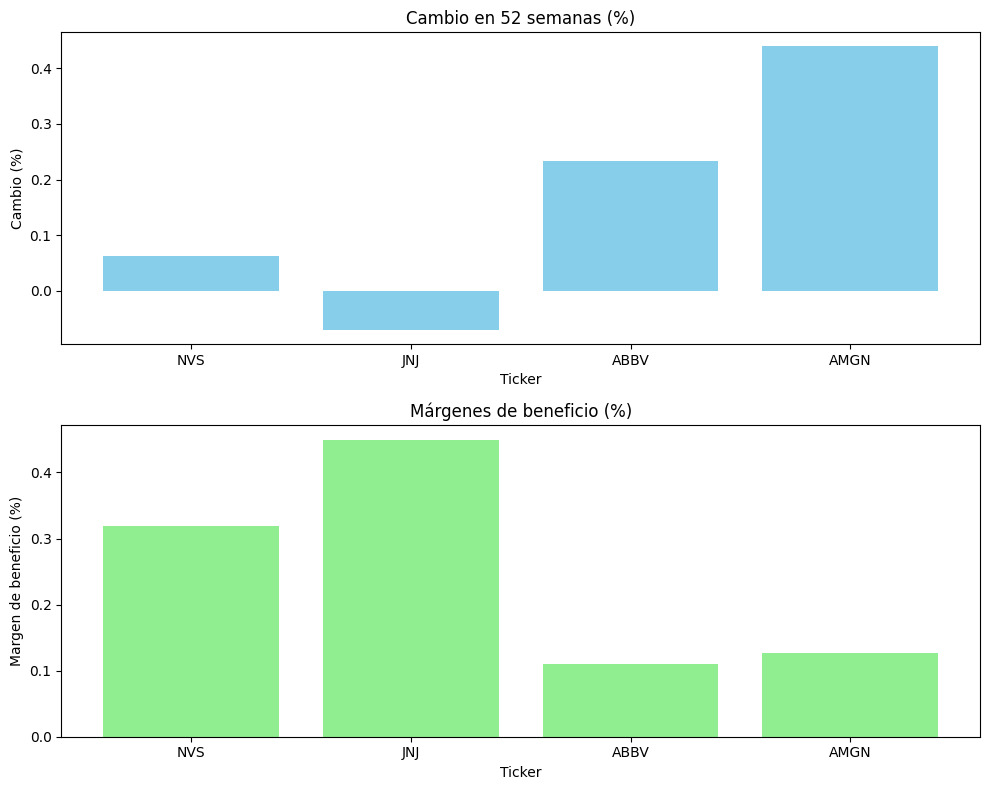

In [37]:
# Sacando algunas estadísticas de interés
tickers = ['NVS', 'JNJ', 'ABBV', 'AMGN']
stock_52w_change = []
profitsMargins = []

for ticker in tickers:
    try:
        current_ticker = yf.Ticker(ticker)
        current_ticker_info = current_ticker.info
        stock_52w_change.append(current_ticker_info.get('52WeekChange', None))
        profitsMargins.append(current_ticker_info.get('profitMargins', None))
        print(f'{ticker} - 52WeekChange: {current_ticker_info.get("52WeekChange", "N/A")}, ProfitMargins: {current_ticker_info.get("profitMargins", "N/A")}')
    except Exception as e:
        print(f'Error al obtener datos para {ticker}: {e}')
        stock_52w_change.append(None)
        profitsMargins.append(None)

# Mostrar las estadísticas en gráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de 52WeekChange
axs[0].bar(tickers, stock_52w_change, color='skyblue')
axs[0].set_title('Cambio en 52 semanas (%)')
axs[0].set_ylabel('Cambio (%)')
axs[0].set_xlabel('Ticker')

# Gráfico de ProfitMargins
axs[1].bar(tickers, profitsMargins, color='lightgreen')
axs[1].set_title('Márgenes de beneficio (%)')
axs[1].set_ylabel('Margen de beneficio (%)')
axs[1].set_xlabel('Ticker')

plt.tight_layout()
plt.show()


# Datos desde APIs con credenciales (Kaggle)

In [53]:
! pip install -q kaggle
#https://drive.google.com/file/d/XXXXXXXXXXXXXXXXXX/view?usp=sharing
! gdown --id XXXXXXXXXXXXXXXXXX # IMPORTANTE: CAMBIAR CON SU ID PERSONAL

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pLmy5YA_U2s6SZB8RKdDNLPVBtJY6Uoz
To: /content/gdrive/MyDrive/CODERHOUSE PROFE/Data Science || curso/Data Science_ Machine Learning/Clase 2 - Data Acquisition/kaggle.json
100% 75.0/75.0 [00:00<00:00, 297kB/s]


In [58]:
#! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list #descomentar para ver si todo esta bien

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          16646        350  1.0              
stacknishant/nse-stock-historical-price-data                        NSE Stock Historical price data                      20MB  2024-07-11 10:58:10           1367         24  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          12543        264  1.0              
ihelon/coffee-sales                     

In [59]:
!kaggle datasets download -d rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 3.30MB/s]


In [73]:
!unzip "/content/gdrive/MyDrive/CODERHOUSE PROFE/Data Science || curso/Data Science_ Machine Learning/Clase 2 - Data Acquisition/students-performance-dataset.zip"

Archive:  /content/gdrive/MyDrive/CODERHOUSE PROFE/Data Science || curso/Data Science_ Machine Learning/Clase 2 - Data Acquisition/students-performance-dataset.zip
  inflating: Student_performance_data _.csv  


In [78]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [74]:
df = pd.read_csv("/content/gdrive/MyDrive/CODERHOUSE PROFE/Data Science || curso/Data Science_ Machine Learning/Clase 2 - Data Acquisition/Student_performance_data _.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [75]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [79]:
# 1. Distribución de edades
fig_age = px.histogram(df, x="Age", title="Distribución de Edades")

# 2. Distribución de género
fig_gender = px.pie(df, names="Gender", title="Distribución de Género")

# 3. Relación entre GPA y tiempo de estudio semanal
fig_gpa_study = px.scatter(df, x="StudyTimeWeekly", y="GPA", color="Gender",
                           title="GPA vs Tiempo de Estudio Semanal")

# 4. Boxplot de GPA por nivel educativo de los padres
fig_gpa_parent = px.box(df, x="ParentalEducation", y="GPA",
                        title="GPA por Nivel Educativo de los Padres")

# 5. Heatmap de correlación
corr_matrix = df.corr()
fig_heatmap = px.imshow(corr_matrix, title="Matriz de Correlación")

# 6. GPA promedio por actividad extracurricular
extracurricular_avg = df.groupby("Extracurricular")["GPA"].mean().reset_index()
fig_extracurricular = px.bar(extracurricular_avg, x="Extracurricular", y="GPA",
                             title="GPA Promedio por Actividad Extracurricular")

# 7. Subplots para comparar distribuciones
fig_subplots = make_subplots(rows=2, cols=2, subplot_titles=("Distribución de GPA",
                                                             "Distribución de Tiempo de Estudio",
                                                             "Distribución de Ausencias",
                                                             "Distribución de Apoyo Parental"))

fig_subplots.add_trace(go.Histogram(x=df["GPA"], name="GPA"), row=1, col=1)
fig_subplots.add_trace(go.Histogram(x=df["StudyTimeWeekly"], name="Tiempo de Estudio"), row=1, col=2)
fig_subplots.add_trace(go.Histogram(x=df["Absences"], name="Ausencias"), row=2, col=1)
fig_subplots.add_trace(go.Histogram(x=df["ParentalSupport"], name="Apoyo Parental"), row=2, col=2)

fig_subplots.update_layout(height=800, width=1000, title_text="Comparación de Distribuciones")

# Mostrar todas las figuras
fig_age.show()
fig_gender.show()
fig_gpa_study.show()
fig_gpa_parent.show()
fig_heatmap.show()
fig_extracurricular.show()
fig_subplots.show()